In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from scipy import stats
import seaborn as sns
import requests

In [2]:
#reading CSV file
file=pd.read_csv("fundamentals.csv")

In [3]:
symbols=file['Ticker Symbol'].to_list()

In [4]:
def get_price(symbol):
    header = {'Connection': 'keep-alive',
                   'Expires': '-1',
                   'Upgrade-Insecure-Requests': '1',
                   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) \
                   AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36'
                   }
    url = f"https://query1.finance.yahoo.com/v7/finance/quote?symbols={symbol}"
    response = requests.get(url,headers=header)
    if response.status_code == 200:
        try:
            result = response.json()['quoteResponse']['result'][0]
        except Exception as e:
            result = {}
            pass
    else:
        print(response)
        result = {}
        
    metrics = ["regularMarketPrice", "fiftyTwoWeekLow", "fiftyTwoWeekHigh"]
    
    stock_data=[]
    stock_data.append(symbol)
    for metric in metrics:
        if metric in result:
            stock_data.append(result[metric])
        else:
            stock_data.append(None)
    return stock_data  

In [5]:
data=[]
count = len(symbols)
for index, sym in enumerate(symbols):
    try:
        print(f"processed {index+1}/{count}", end="\r")
        prices=get_price(sym)
        data.append(prices)
    except Exception as err:
        data.append([sym, None, None, None])
        print(err)
        print(sym)
        continue

In [6]:
data

[['AAL', 15.25, 11.93, 22.35],
 ['AAL', 15.25, 11.93, 22.35],
 ['AAL', 15.25, 11.93, 22.35],
 ['AAL', 15.25, 11.93, 22.35],
 ['AAP', 202.53, 164.0, 244.55],
 ['AAP', 202.53, 164.0, 244.55],
 ['AAP', 202.53, 164.0, 244.55],
 ['AAP', 202.53, 164.0, 244.55],
 ['AAPL', 172.1, 129.04, 182.94],
 ['AAPL', 172.1, 129.04, 182.94],
 ['AAPL', 172.1, 129.04, 182.94],
 ['AAPL', 172.1, 129.04, 182.94],
 ['ABBV', 142.6, 105.56, 175.91],
 ['ABBV', 142.6, 105.56, 175.91],
 ['ABBV', 142.6, 105.56, 175.91],
 ['ABBV', 142.6, 105.56, 175.91],
 ['ABC', 150.5, 113.68, 167.19],
 ['ABC', 150.5, 113.68, 167.19],
 ['ABC', 150.5, 113.68, 167.19],
 ['ABC', 150.5, 113.68, 167.19],
 ['ABT', 111.48, 101.24, 142.6],
 ['ABT', 111.48, 101.24, 142.6],
 ['ABT', 111.48, 101.24, 142.6],
 ['ABT', 111.48, 101.24, 142.6],
 ['ADBE', 445.67, 338.0, 699.54],
 ['ADBE', 445.67, 338.0, 699.54],
 ['ADBE', 445.67, 338.0, 699.54],
 ['ADBE', 445.67, 338.0, 699.54],
 ['ADI', 179.26, 138.5, 191.95],
 ['ADI', 179.26, 138.5, 191.95],
 ['ADI

In [7]:
df = pd.DataFrame(data, columns=['ticker Symbol', 'regularMarketPrice', 'fifty Two Week Low', 'fifty Two Week High'])

In [8]:
df

,ticker Symbol,regularMarketPrice,fifty Two Week Low,fifty Two Week High
0,AAL,15.25,11.93,22.35
1,AAL,15.25,11.93,22.35
2,AAL,15.25,11.93,22.35
3,AAL,15.25,11.93,22.35
4,AAP,202.53,164.00,244.55
...,...,...,...,...
1776,ZION,58.22,47.92,75.44
1777,ZTS,175.67,154.18,249.27
1778,ZTS,175.67,154.18,249.27
1779,ZTS,175.67,154.18,249.27


### Step1: Renaming Headers

In [9]:
df.rename(columns={"ticker Symbol": "Ticker", "regularMarketPrice": "Current Price", "fifty Two Week Low": "Fifty Two Week Low", "fifty Two Week High" : "Fifty Two Week High"}, inplace=True)

In [10]:
df

,Ticker,Current Price,Fifty Two Week Low,Fifty Two Week High
0,AAL,15.25,11.93,22.35
1,AAL,15.25,11.93,22.35
2,AAL,15.25,11.93,22.35
3,AAL,15.25,11.93,22.35
4,AAP,202.53,164.00,244.55
...,...,...,...,...
1776,ZION,58.22,47.92,75.44
1777,ZTS,175.67,154.18,249.27
1778,ZTS,175.67,154.18,249.27
1779,ZTS,175.67,154.18,249.27


### Step2: Replacing white spaces in column names with underscore

In [11]:
df.columns = df.columns.str.replace(' ','_')

In [12]:
df

,Ticker,Current_Price,Fifty_Two_Week_Low,Fifty_Two_Week_High
0,AAL,15.25,11.93,22.35
1,AAL,15.25,11.93,22.35
2,AAL,15.25,11.93,22.35
3,AAL,15.25,11.93,22.35
4,AAP,202.53,164.00,244.55
...,...,...,...,...
1776,ZION,58.22,47.92,75.44
1777,ZTS,175.67,154.18,249.27
1778,ZTS,175.67,154.18,249.27
1779,ZTS,175.67,154.18,249.27


### Step3: Check for missing values

In [13]:
df.isna().sum()

Ticker                   0
Current_Price          236
Fifty_Two_Week_Low     232
Fifty_Two_Week_High    232
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1781 non-null   object 
 1   Current_Price        1545 non-null   float64
 2   Fifty_Two_Week_Low   1549 non-null   float64
 3   Fifty_Two_Week_High  1549 non-null   float64
dtypes: float64(3), object(1)
memory usage: 55.8+ KB


### Step4: Drop null values

In [15]:
df.fillna(0.0, inplace=True)

In [16]:
df.isna().sum()

Ticker                 0
Current_Price          0
Fifty_Two_Week_Low     0
Fifty_Two_Week_High    0
dtype: int64

### Step5: Check for duplicates and drop them if exists

In [17]:
df.duplicated().sum()

1333

In [18]:
df.drop_duplicates()

,Ticker,Current_Price,Fifty_Two_Week_Low,Fifty_Two_Week_High
0,AAL,15.25,11.93,22.35000
4,AAP,202.53,164.00,244.55000
8,AAPL,172.10,129.04,182.94000
12,ABBV,142.60,105.56,175.91000
16,ABC,150.50,113.68,167.19000
...,...,...,...,...
1761,YHOO,0.00,0.00,0.00000
1765,YUM,118.16,108.37,139.85000
1769,ZBH,117.22,100.39,149.28156
1773,ZION,58.22,47.92,75.44000


### Step6: Calculating outliers

In [19]:
df.describe()

,Current_Price,Fifty_Two_Week_Low,Fifty_Two_Week_High
count,1781.000000,1781.000000,1781.000000
mean,125.351510,97.477287,154.751833
std,184.900033,136.673029,214.516892
min,0.000000,0.000000,0.000000
25%,31.620000,22.250000,39.040000
50%,80.580000,61.590000,98.450000
75%,164.070000,127.580000,191.620000
max,2259.180000,1503.300000,2267.400000


<AxesSubplot:xlabel='Current_Price'>

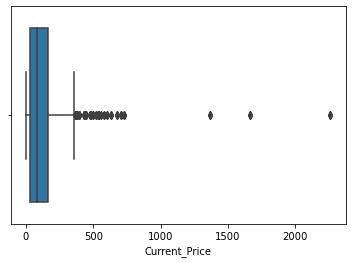

In [20]:
sns.boxplot(x=df['Current_Price'])

In [21]:
# Checking for outlier rows 
df1 = df[np.abs(stats.zscore(df["Current_Price"])) > 3]
df1

,Ticker,Current_Price,Fifty_Two_Week_Low,Fifty_Two_Week_High
182,AZO,2259.18,1503.30,2267.40
183,AZO,2259.18,1503.30,2267.40
184,AZO,2259.18,1503.30,2267.40
185,AZO,2259.18,1503.30,2267.40
338,CMG,1663.70,1196.28,1958.55
339,CMG,1663.70,1196.28,1958.55
340,CMG,1663.70,1196.28,1958.55
341,CMG,1663.70,1196.28,1958.55
556,EQIX,704.56,606.12,885.26
557,EQIX,704.56,606.12,885.26


In [22]:
df.to_csv("apiData.csv")